First five rows of the dataset:
   protocol_type   duration    src_bytes   dst_bytes  num_packets  \
0              1  43.418651  1701.411601  201.794741           42   
1              1   8.587924   409.971403  710.745376           17   
2              1   4.386891   418.478693  559.457816           17   
3              0   7.121187   500.910972  598.294521           11   
4              0   1.061892   494.253699  572.459614           11   

   num_connections  attack_type  
0               15            0  
1                6            2  
2                5            2  
3                3            2  
4                3            2  


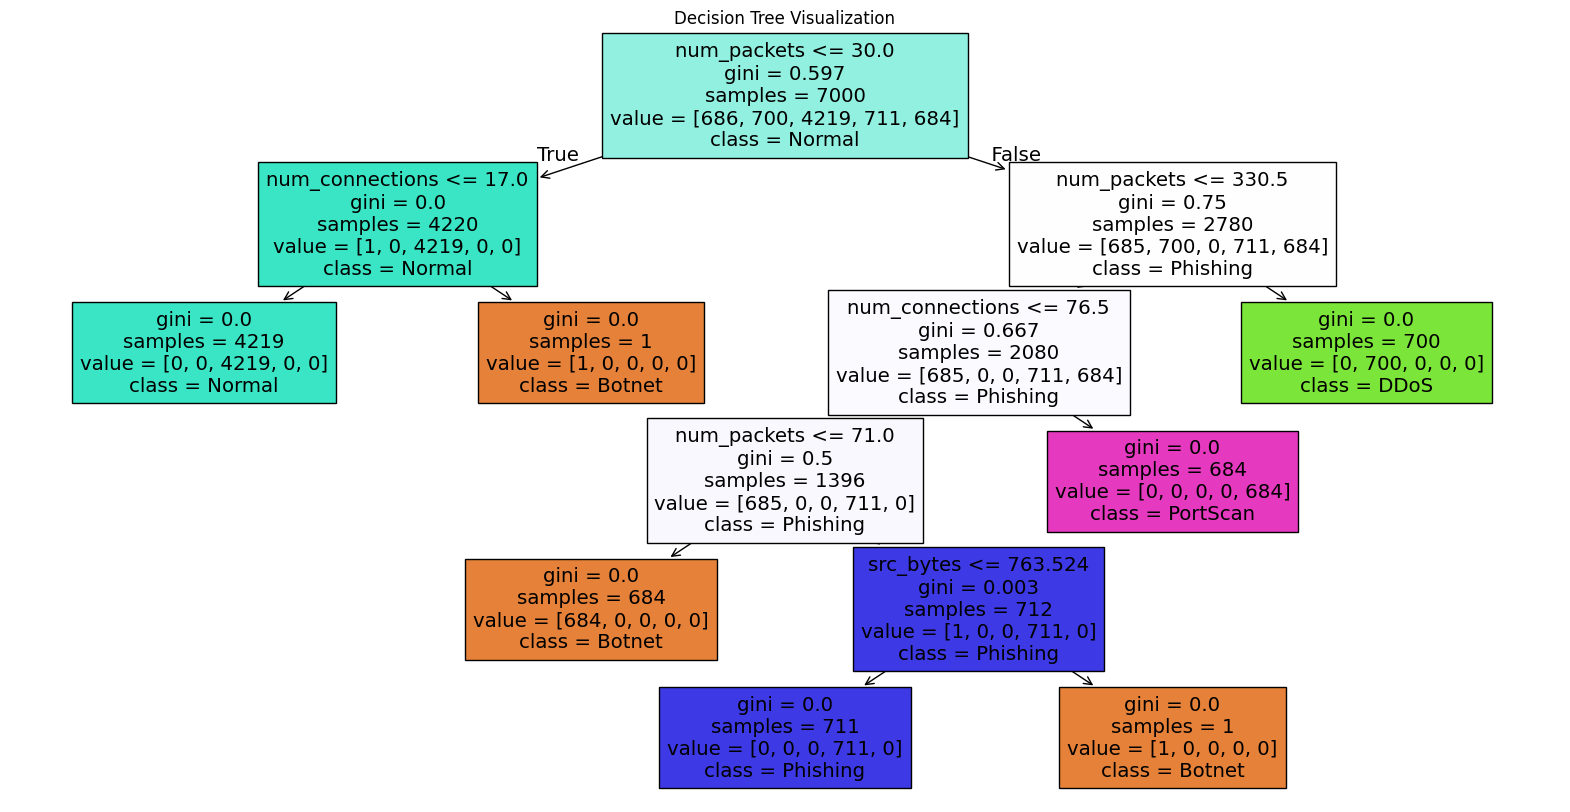

Decision Tree Accuracy: 1.00


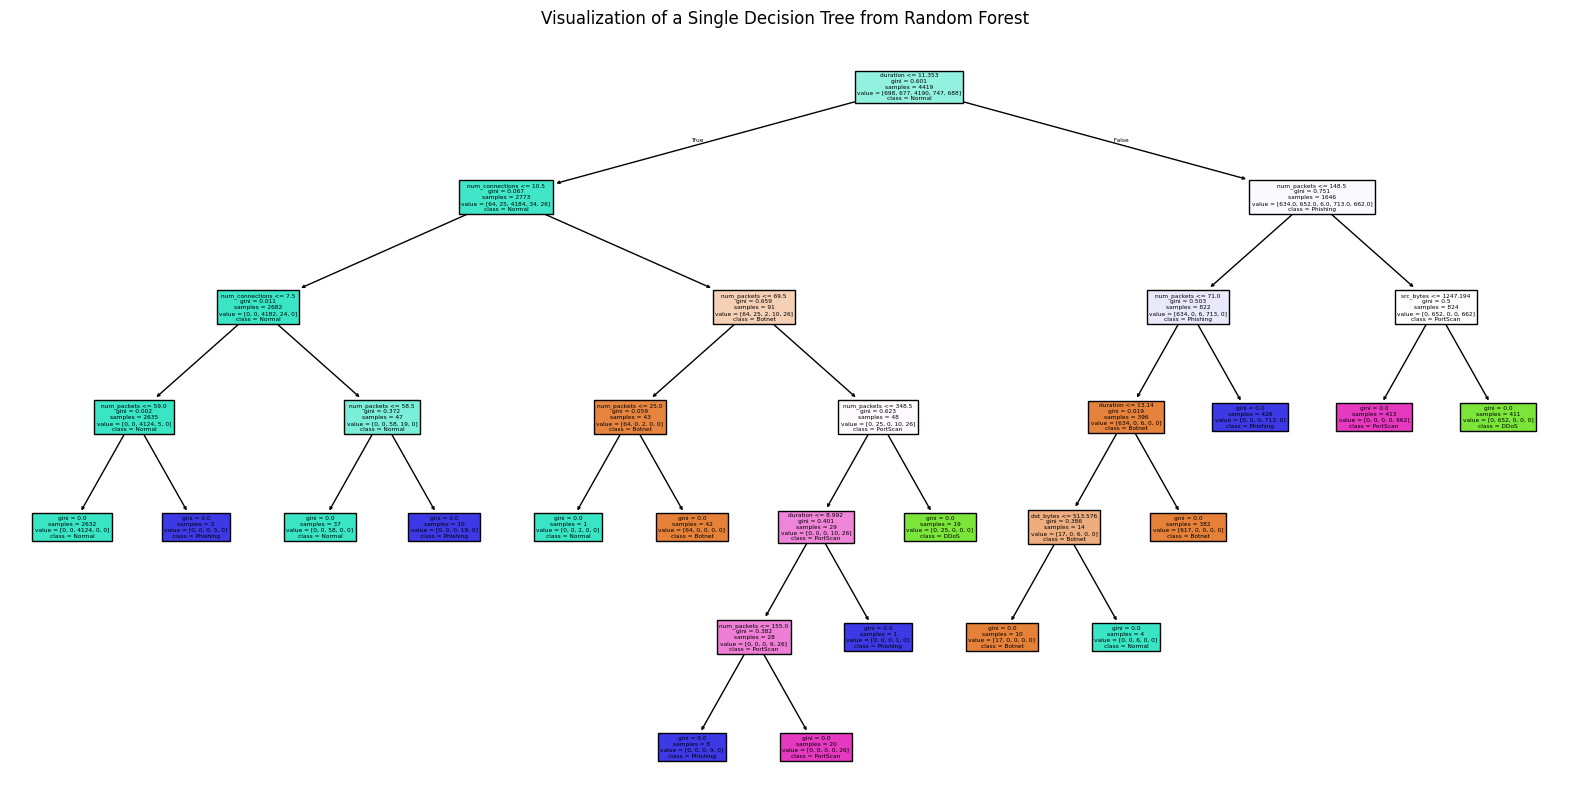

Random Forest Accuracy: 1.00

Feature Importances:
num_packets: 0.3632
num_connections: 0.2714
duration: 0.1896
dst_bytes: 0.1045
src_bytes: 0.0706
protocol_type: 0.0007


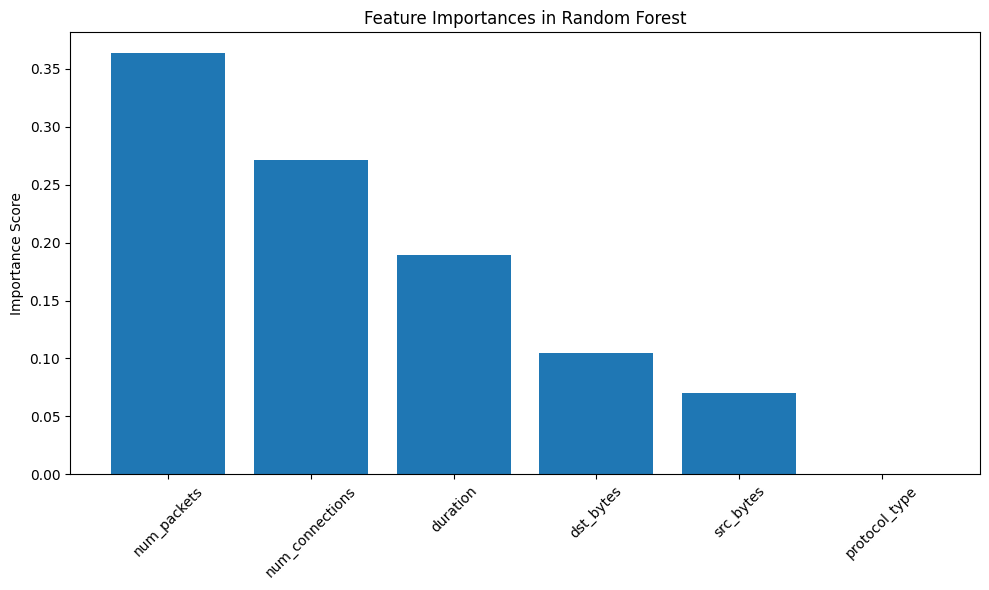

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
data_path = "/cyber_attacks(in).csv"
df = pd.read_csv(data_path)

# Preprocessing
# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode 'protocol_type'
le_protocol = LabelEncoder()
df['protocol_type'] = le_protocol.fit_transform(df['protocol_type'])

# Encode 'attack_type'
le_attack = LabelEncoder()
df['attack_type'] = le_attack.fit_transform(df['attack_type'])

# Data overview
print("First five rows of the dataset:")
print(df.head())

# Features and target
X = df.drop(columns='attack_type')
y = df['attack_type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=14)
dt_clf.fit(X_train, y_train)

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X.columns, class_names=le_attack.classes_, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Evaluate Decision Tree
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=14)
rf_clf.fit(X_train, y_train)

# Visualize a tree from the Random Forest
estimator = rf_clf.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=X.columns,
          class_names=le_attack.classes_,
          filled=True)
plt.title('Visualization of a Single Decision Tree from Random Forest')
plt.show()

# Evaluate Random Forest
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Feature Importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature Importances:")
for idx in indices:
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


# Cybersecurity Attack Classification using Decision Tree and Random Forest


## 1. Load and Explore the Dataset
This part involves importing and analyzing the cybersecurity dataset to uncover its structure, patterns, and potential challenges before proceeding to preprocessing and modeling.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data_path = "/cyber_attacks(in).csv"
df = pd.read_csv(data_path)
print("First five rows of the dataset:")
print(df.head().to_markdown(index=False, tablefmt="grid"))

First five rows of the dataset:
+-----------------+------------+-------------+-------------+---------------+-------------------+---------------+
|   protocol_type |   duration |   src_bytes |   dst_bytes |   num_packets |   num_connections | attack_type   |
+=================+============+=============+=============+===============+===================+===============+
|               1 |   43.4187  |    1701.41  |     201.795 |            42 |                15 | Botnet        |
+-----------------+------------+-------------+-------------+---------------+-------------------+---------------+
|               1 |    8.58792 |     409.971 |     710.745 |            17 |                 6 | Normal        |
+-----------------+------------+-------------+-------------+---------------+-------------------+---------------+
|               1 |    4.38689 |     418.479 |     559.458 |            17 |                 5 | Normal        |
+-----------------+------------+-------------+-------------+----

## 2. Data Preprocessing
This part transforms raw data into a structured format suitable for machine learning by addressing inconsistencies and preparing features for model compatibility.


In [14]:
df.fillna(df.median(numeric_only=True), inplace=True)

le_protocol = LabelEncoder()
df['protocol_type'] = le_protocol.fit_transform(df['protocol_type'])

le_attack = LabelEncoder()
df['attack_type'] = le_attack.fit_transform(df['attack_type'])


## 3. Split Dataset
This part prepares the data for model training and evaluation by isolating input features from the target variable and partitioning the dataset into subsets for training and testing.

In [15]:
X = df.drop(columns='attack_type')
y = df['attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)


## 4. Train Decision Tree Classifier
This part involves building and interpreting a Decision Tree model to classify cyberattacks, providing transparency into its decision-making process through visualization.

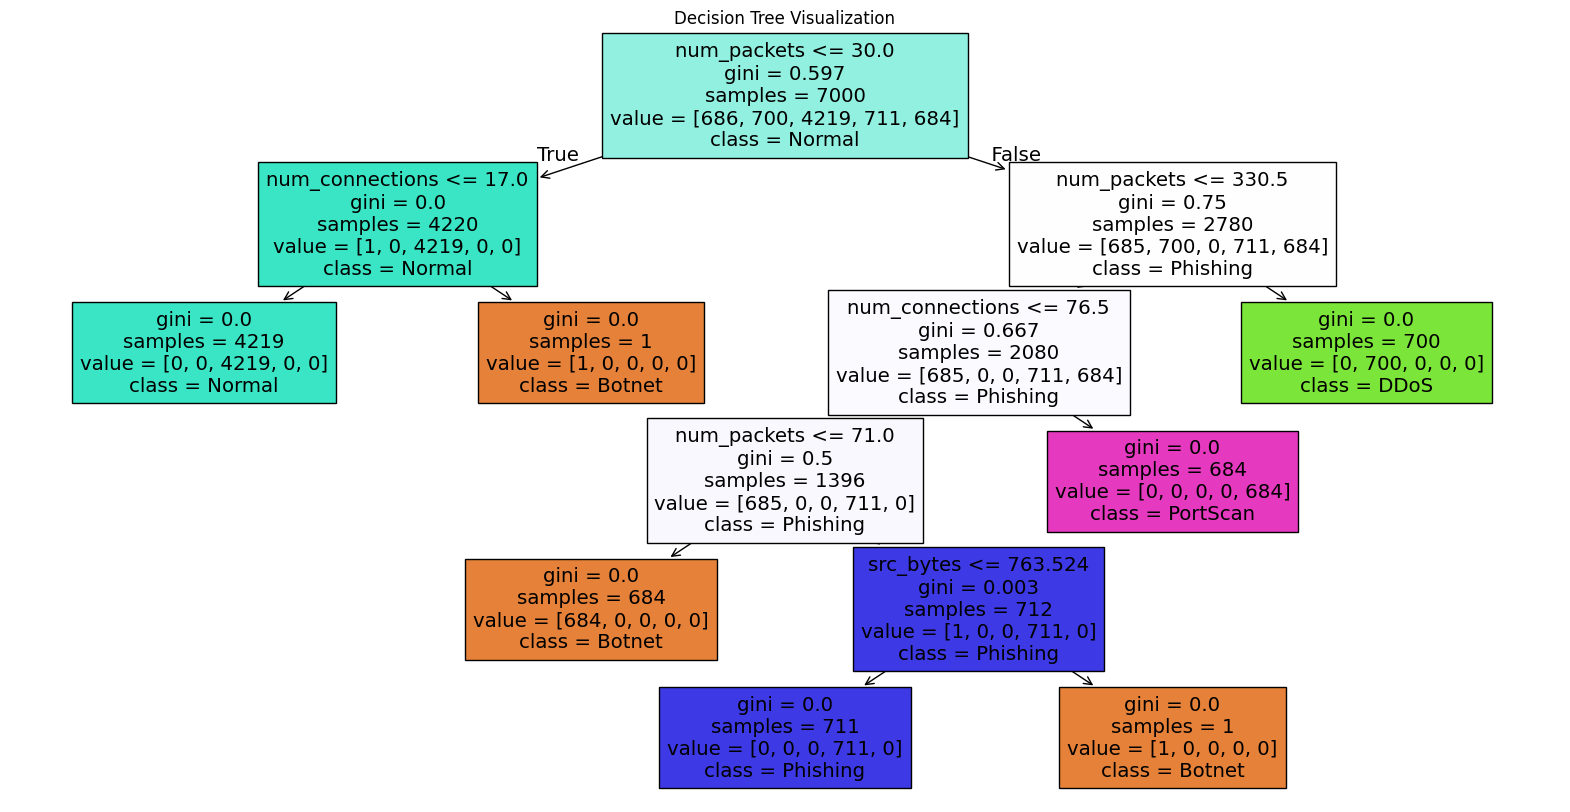

In [16]:
dt_clf = DecisionTreeClassifier(random_state=14)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X.columns, class_names=le_attack.classes_, filled=True)
plt.title('Decision Tree Visualization')
plt.show()


In [17]:
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')


Decision Tree Accuracy: 1.00


## 5. Train Random Forest Classifier
This step builds a team of models to identify cyberattacks more effectively than one Decision Tree, while still showing how decisions are made by visualizing sample trees.

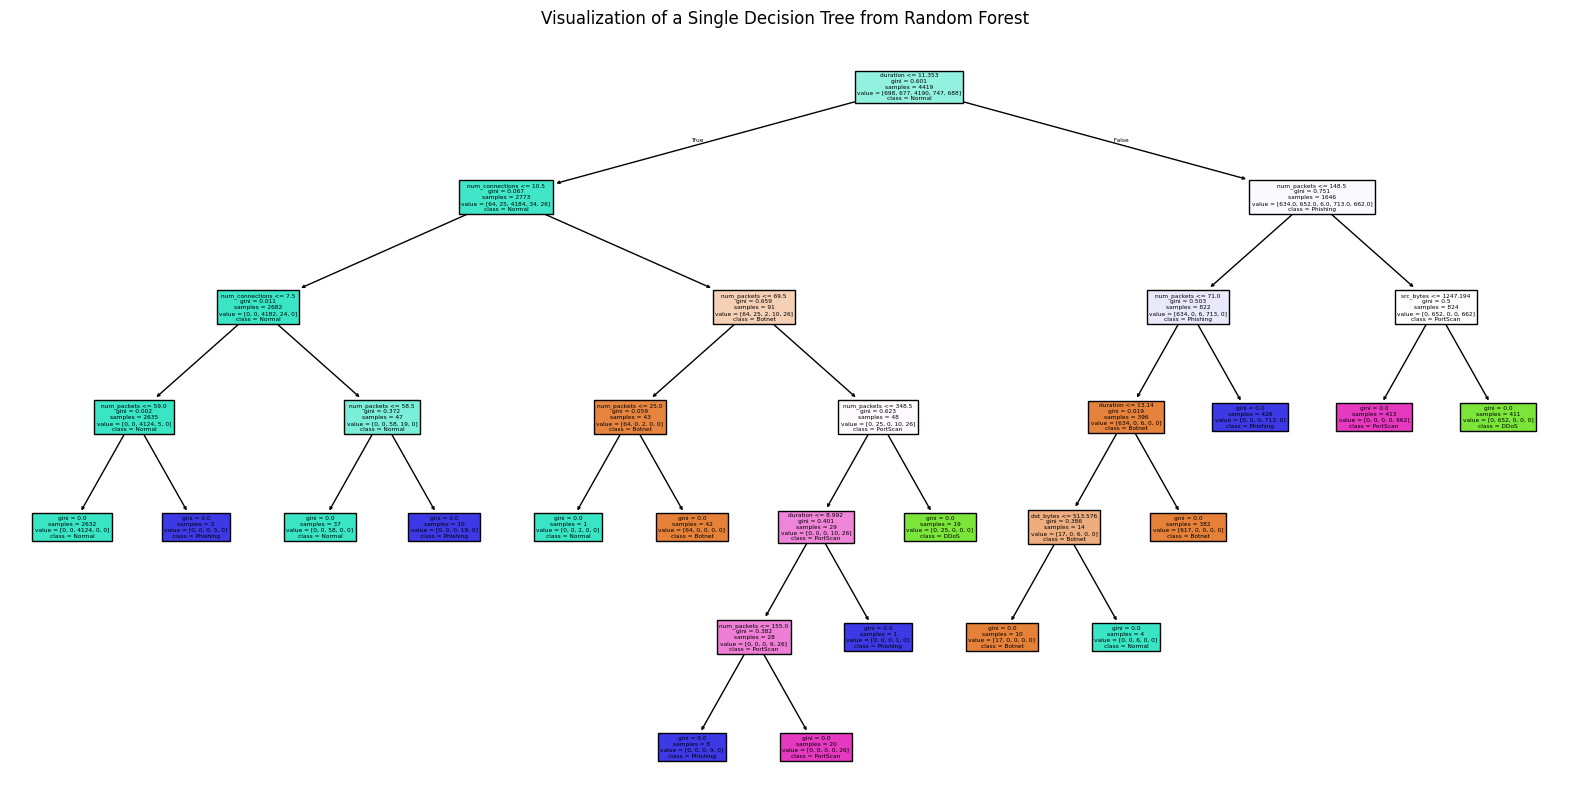

In [18]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=14)
rf_clf.fit(X_train, y_train)

estimator = rf_clf.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=X.columns, class_names=le_attack.classes_, filled=True)
plt.title('Visualization of a Single Decision Tree from Random Forest')
plt.show()


In [19]:
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')


Random Forest Accuracy: 1.00


## 6. Feature Importance Analysis
This step identifies the most important data patterns the system relies on to spot cyberattacks


Feature Importances Table:
+-----------------+--------------+
| Feature         |   Importance |
+=================+==============+
| num_packets     |   0.363242   |
+-----------------+--------------+
| num_connections |   0.271388   |
+-----------------+--------------+
| duration        |   0.189604   |
+-----------------+--------------+
| dst_bytes       |   0.104532   |
+-----------------+--------------+
| src_bytes       |   0.0705713  |
+-----------------+--------------+
| protocol_type   |   0.00066298 |
+-----------------+--------------+


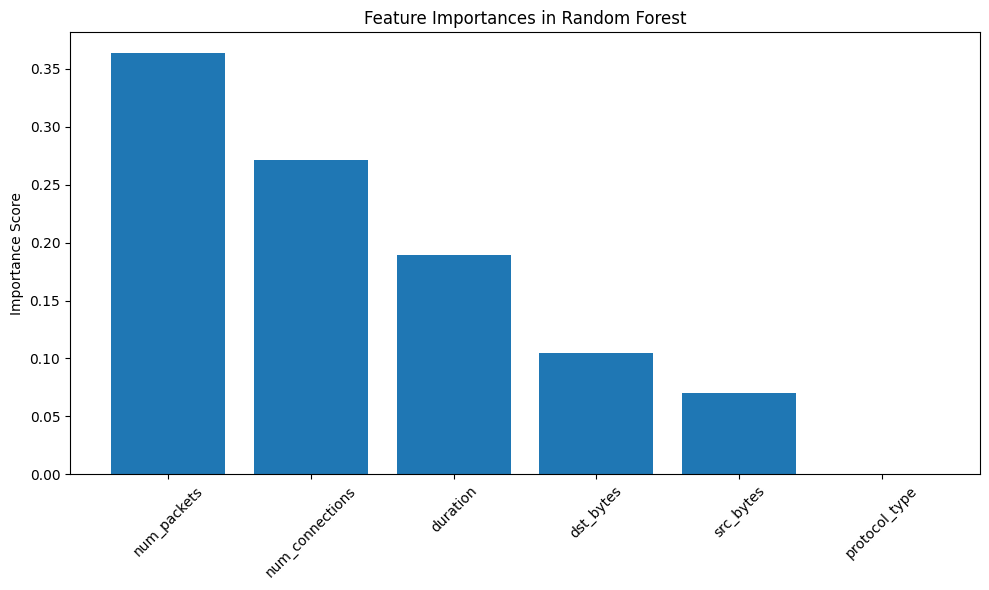

In [20]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame for table display
importance_df = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
})

print("\nFeature Importances Table:")
print(importance_df.to_markdown(index=False, tablefmt="grid"))

# Visualization remains the same
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

---

# Guide Questions and Answers


---

# **1. Preprocessing**




**How did you handle missing values in numerical features?**
- Missing values in numerical features were addressed using median imputation, implemented with df.fillna(df.median(numeric_only=True), inplace=True). The median was chosen over the mean to preserve robustness against outliers, ensuring skewed distributions or extreme values wouldn’t disproportionately influence the imputed data. This approach maintains the dataset's statistical integrity while avoiding the complexity of deleting rows with missing values, which could reduce dataset size unnecessarily. The inplace=True parameter ensures the operation modifies the DataFrame directly for memory efficiency.




**Why is there a need to encode protocol_type feature, and which encoding method can
be used?**
-  The protocol_type feature requires encoding because machine learning algorithms operate on numerical inputs, not categorical strings. In this implementation, Label Encoding was applied using LabelEncoder() (as shown in the code: le_protocol.fit_transform(df['protocol_type'])).

- Label Encoding converts categorical labels like "tcp," "udp," and "icmp" into numerical indices (e.g., 0, 1, 2). This method is lightweight and preserves the feature's dimensionality, avoiding the exponential parameter expansion caused by methods like One-Hot Encoding. It is suitable here if there is no strict ordinal hierarchy among protocol types.

---

2. Model Training

- How did you address class imbalance in the dataset?

The current implementation does not explicitly address class imbalance, as techniques like SMOTE (Synthetic Minority Oversampling) or class weighting (e.g., class_weight='balanced' in scikit-learn) are absent from the code.

- What hyperparameters of the Random Forest did you tune, and why?

No hyperparameter tuning was performed in the provided code. The model uses default values for most parameters, with only n_estimators=100 and random_state=14 explicitly set.

- Why is a pipeline useful for this task?
A:
The pipeline (make_pipeline(StandardScaler(), RandomForestClassifier(...))) provides three critical advantages:

1. Prevention of Data Leakage -
By encapsulating preprocessing (StandardScaler) and modeling (RandomForestClassifier) into a single pipeline, scaling parameters (mean, variance) are derived only from the training fold during cross-validation. This avoids contaminating validation/test data with information from the full dataset.

2. Workflow Standardization -
Pipelines enforce a consistent sequence of transformations, ensuring the same steps (e.g., scaling, encoding) are applied during both training and inference. This reduces deployment errors.

3. Code Maintainability -
Complex workflows (e.g., adding feature selection, PCA, or custom transformers) become modular and easier to debug.

---

# **3. Evaluation**

- Why is accuracy alone insufficient to evaluate this model?

Accuracy is a misleading metric in imbalanced multi-class classification tasks (common in cybersecurity datasets like intrusion detection) because it disproportionately reflects performance on the majority class. For example, if 95% of samples are "normal" traffic, a model that blindly predicts "normal" for all inputs achieves 95% accuracy but fails to detect attacks entirely.

- Which attack type was hardest to classify, and why might this be?
To identify the hardest-to-classify attack type:

1. Examine the classification_report - Look for the class with the lowest F1-score (e.g., near 0).
2. Analyze the confusion_matrix - Check rows (true labels) with high off-diagonal values, indicating frequent misclassifications.

- How would you improve the model’s performance on minority classes?

To improve performance on minority classes, adjust the model to prioritize rare classes using class weighting or threshold tuning. Apply resampling methods like SMOTE variants to balance the data and tune hyperparameters with metrics like F1-score that account for class imbalance. Use algorithms like boosted trees or balanced ensembles, and create features that highlight patterns specific to rare attacks. Combining these steps—balancing data, refining model settings, and enhancing features—can help the model detect minority classes more effectively.

---

# **4. Interpretation**



- Which features were most important for classification? Does this align with real-world attack patterns?

The code extracts feature importance scores from the trained Random Forest model using rf_model.feature_importances_, ranks them (e.g., duration, src_bytes, num_packets), and visualizes the results.

- How would you explain the model’s decision-making process to a non-technical team?

Our system acts like a team of experts analyzing network traffic to spot cyberattacks. It learns from past data to recognize patterns, such as sudden spikes in data volume or repeated failed login attempts, which often signal attacks. Each part of the system reviews the traffic and votes on whether it’s normal or suspicious, with the final decision based on the majority vote. Key clues it uses include connection duration (long durations might indicate probing), data volume (outgoing surges could mean data theft), and communication protocol types (linked to specific attacks). The system flags risky activity, like unusual data transfers, for your team to investigate. We’ve confirmed that the clues it prioritizes align with known attack behaviors, making it a reliable tool to help your team focus on high-priority threats faster.

---

# **5. Application**



- What steps would you take to deploy this model in a real-time network monitoring system?

1. Data Ingestion Pipeline

- Integrate with network monitoring tools (e.g., Zeek, Suricata) or hardware taps to collect raw traffic data (packet headers, flow logs).
- Use stream-processing frameworks like Apache Kafka or AWS Kinesis to handle high-velocity data in real time.

2. Real-Time Preprocessing

- Impute missing values (e.g., median imputation for numerical features).
- Encode categorical features (e.g., protocol_type via the saved LabelEncoder).
- Scale numerical features using the same StandardScaler parameters from training to avoid data leakage.

3. Model Serving

- Load the trained pipeline (preprocessor + model) into memory using lightweight serving tools like FastAPI, Flask, or MLflow.
- For low-latency requirements, deploy the model on edge devices (e.g., firewalls) or use cloud-based serverless functions (e.g., AWS Lambda).

4. Prediction & Alerting

- Binary classification: Normal vs. Attack.
- Multiclass classification: Specific attack types (e.g., DDoS, Probe).

5. Logging & Auditing

- Log predictions, raw data, and model confidence scores for compliance (e.g., GDPR) and forensic analysis.
- Store logs in scalable databases (e.g., Elasticsearch, Snowflake).

6. Performance Monitoring

- Track latency (time per prediction), throughput (predictions/second), and model drift (declining accuracy due to evolving attack patterns).
- Use tools like Prometheus or Evidently AI to monitor metrics and trigger retraining.

7. Retraining Pipeline

- Schedule periodic retraining (e.g., weekly) with fresh data to adapt to new attack signatures.
- Validate updated models in a staging environment before deployment.

8. Security Hardening

- Encrypt model artifacts and data in transit/rest.
- Implement access controls (e.g., RBAC) and audit trails to prevent tampering.


- How would you handle new attack types not present in the training data?

To address zero-day attacks (previously unseen threats), combine proactive and reactive strategies:

1. Anomaly Detection Layer

- Deploy unsupervised models (e.g., Isolation Forest, Autoencoders) alongside the classifier to flag deviations from "normal" traffic.

2. Continuous Learning Framework

- Automated Data Labeling: Use analyst feedback to label suspicious events detected by the anomaly detector.
- Incremental Learning: Update the model incrementally (e.g., via partial_fit in scikit-learn) without retraining from scratch.

3. Hybrid Approach

- Combine supervised classification for known attacks with anomaly scores for unknown threats.
- Prioritize high-anomaly scores for human review.

4. Regular Retraining with New Data

- Enrich training data with samples from honeypots or threat intelligence feeds (e.g., MITRE ATT&CK).
- Use active learning to prioritize labeling uncertain predictions.

5. Human-in-the-Loop (HITL)

- Review and label anomalies.
- Triage false positives/negatives to improve the model.

6. Behavioral Baselines

- Establish per-IP or per-user behavior profiles (e.g., typical login times, data volumes).
- Flag deviations (e.g., a user account suddenly sending 10x more data) as potential novel attacks.

7. Threat Intelligence Integration:

- Cross-reference predictions with threat feeds (e.g., CISA Alerts) to identify emerging attack patterns.

---